In [12]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import statsmodels.api as sms

In [2]:
data=pd.read_csv('Daily_wheat_price.csv')
data.head(10)

,date,open,high,low,close
0,2018-03-12,488.50,492.75,483.00,490.00
1,2018-03-09,499.25,499.25,486.00,490.25
2,2018-03-08,497.50,502.50,490.25,499.25
3,2018-03-07,506.00,509.75,496.00,497.50
4,2018-03-06,507.00,507.50,495.50,506.00
5,2018-03-05,507.75,510.25,495.25,507.00
6,2018-03-02,516.00,518.50,493.25,499.00
7,2018-03-01,495.50,517.75,489.50,516.00
8,2018-02-28,477.50,499.50,476.50,492.50
9,2018-02-27,473.75,479.00,473.50,477.50


In [3]:
data.dtypes

date      object
open     float64
high     float64
low      float64
close    float64
dtype: object

In [4]:
data.count()

date     2272
open     2272
high     2272
low      2272
close    2272
dtype: int64

In [9]:
x=np.array(data['high']).reshape(-1,1)
y=np.array(data['low']).reshape(-1,1)
LR=lm.LinearRegression().fit(x,y)
cd = LR.score(x, y)
print('coefficient of determination:', cd)
print('intercept:', LR.intercept_)
print('slope:', LR.coef_) 
ycap = LR.predict(x)
print('Predicted response:', ycap, sep='\n')

coefficient of determination: 0.9956435522824418
intercept: [4.81922034]
slope: [[0.96712932]]
Predicted response:
[[481.37219117]
 [487.65853173]
 [490.80170201]
 ...
 [494.79594609]
 [501.5658513 ]
 [515.94706424]]


In [11]:
a = pd.DataFrame(data['high'])
b = pd.DataFrame(data['low'])

In [13]:
M = sms.OLS(b,a).fit()
M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    low   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.046e+07
Date:                Tue, 27 Dec 2022   Prob (F-statistic):                        0.00
Time:                        19:17:06   Log-Likelihood:                         -8178.0
No. Observations:                2272   AIC:                                  1.636e+04
Df Residuals:                    2271   BIC:                                  1.636e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
high           0.9748      0.000   3234.671      0.000       0.974       0.975
==============================================================================
Omnibus:                     1296.717   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20235.806
Skew:                          -2.367   Prob(JB):                         0.00
Kurtosis:                      16.833   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

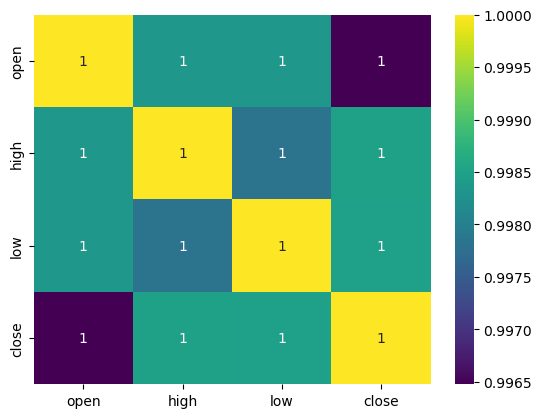

In [14]:
sns.heatmap(data.corr(), annot=True, cmap='viridis')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='high', ylabel='count'>

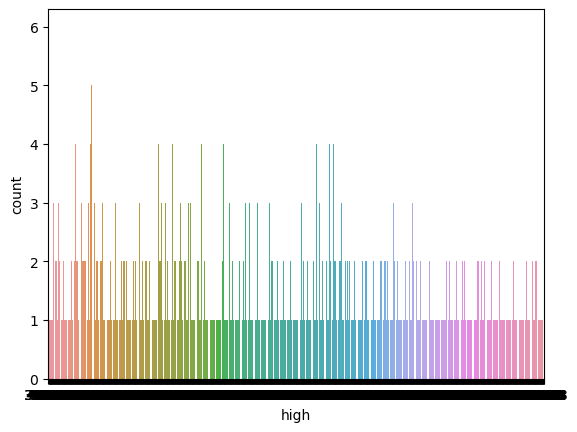

In [16]:
sns.countplot(data.high)

<AxesSubplot:xlabel='high', ylabel='low'>

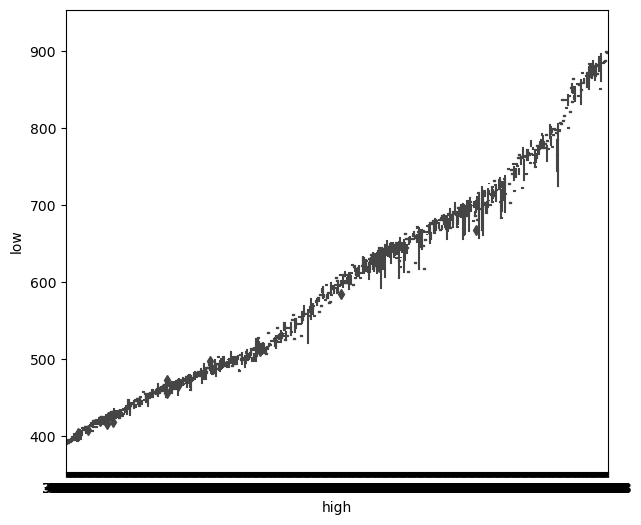

In [17]:
plt.figure(figsize=(7,6))
sns.boxplot(x='high', y='low', data=data)